Estará trabalhando como analista da Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. A tarefa é encontrar padrões nas informações disponíveis. Entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

Trabalhando com um banco de dados, você analisará dados de concorrentes e testará uma hipótese sobre o impacto do clima na frequência das viagens.

Análise exploratória de dados (Python)

In [ ]:
#Importar os arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_trips_amount = pd.read_csv('moved_project_sql_result_01.csv')
df_dropoff_location_name = pd.read_csv('moved_project_sql_result_04.csv')
df_average_trips = pd.read_csv('moved_project_sql_result_07.csv')

In [3]:
#Estudar os dados que eles contêm
print(df_trips_amount.head())
print(df_dropoff_location_name.head())
print(df_average_trips.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [4]:
df_trips_amount

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [5]:
df_average_trips

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [6]:
#Verificar se os tipos de dados estão corretos
print(df_trips_amount.dtypes)
print(df_dropoff_location_name.dtypes)
print(df_average_trips.dtypes)


company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [7]:
#Verificar se há valores ausentes
print(df_trips_amount.isna().sum())
print(df_dropoff_location_name.isna().sum())
print(df_average_trips.isna().sum())

company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [ ]:
#Identificar os 10 principais bairros em termos de destinos?
df_dropoff_location_name.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


C:\Users\Usuário\AppData\Local\Temp\ipykernel_12156\3480466972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dropoff_location_name', y='average_trips', data=df_dropoff_location_name.head(10), palette='coolwarm')


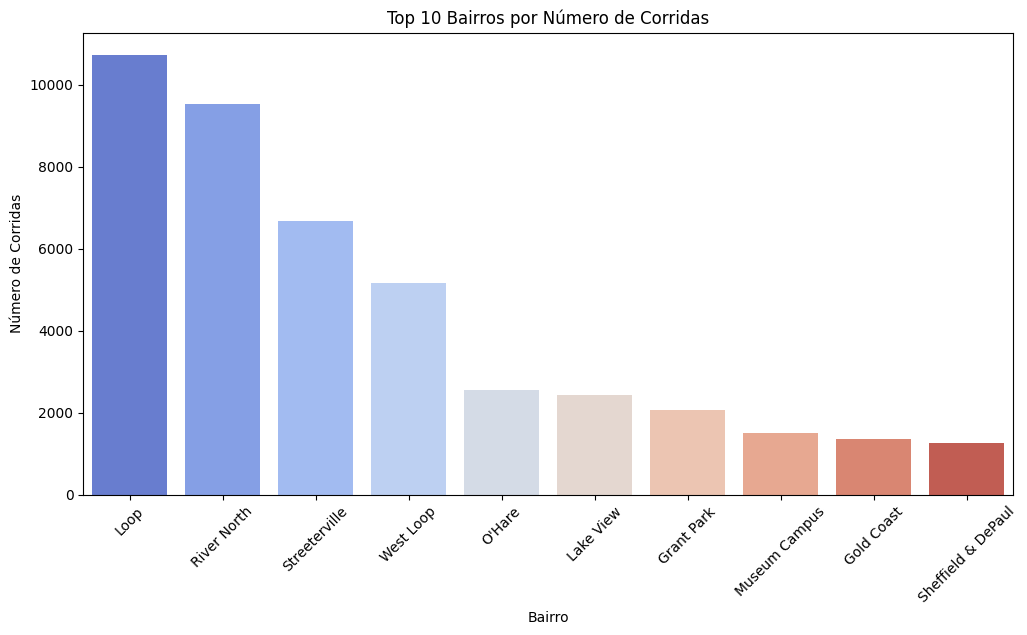

In [9]:
#Fazer gráficos:Top 10 bairros por número de corridas.

plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=df_dropoff_location_name.head(10), palette='coolwarm')
plt.title('Top 10 Bairros por Número de Corridas')
plt.xlabel('Bairro')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45)
plt.show()


In [10]:
df_trips_amount.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


C:\Users\Usuário\AppData\Local\Temp\ipykernel_12156\1322630726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_name', y='trips_amount', data=df_trips_amount.head(10), palette='viridis')


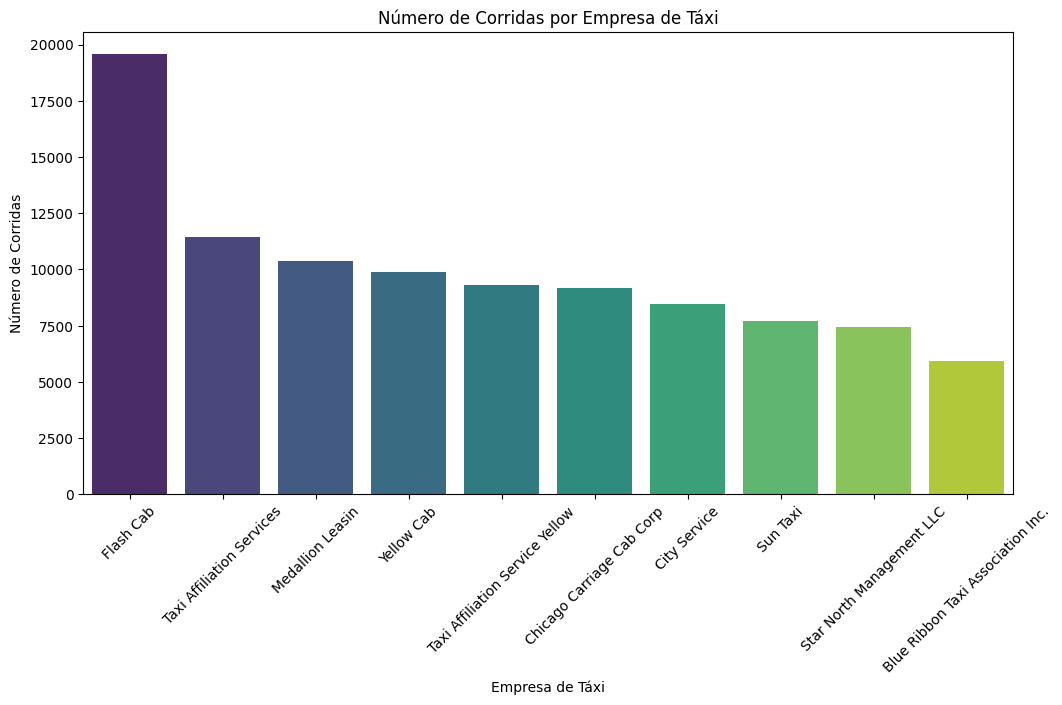

In [11]:
#Empresas de táxi e número de corridas
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=df_trips_amount.head(10), palette='viridis')
plt.title('Número de Corridas por Empresa de Táxi')
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45)
plt.show()


#Conclusões com base em cada gráfico e explicar os resultados
1. O gráfico de barras mostra os 10 bairros com maior número de corridas, indicando onde a demanda é mais alta.
2. O gráfico de barras das empresas de táxi mostra quais empresas têm mais corridas, o que pode indicar popularidade ou eficiência.
3. A análise de dados pode ajudar a identificar tendências e padrões, como horários de pico, áreas de alta demanda e preferências dos clientes.
4. A visualização dos dados facilita a compreensão e a comunicação dos resultados para stakeholders.
5. A análise pode ser usada para otimizar operações, melhorar o serviço ao cliente e aumentar a eficiência das empresas de táxi.

Testando hipóteses (Python)

In [12]:
df_average_trips['start_ts'] = pd.to_datetime(df_average_trips['start_ts'])

In [13]:
df_average_trips['start_ts'].dt.dayofweek

0       5
1       5
2       5
3       5
4       5
       ..
1063    5
1064    5
1065    5
1066    5
1067    5
Name: start_ts, Length: 1068, dtype: int32

In [14]:
#Teste a hipótese:

#"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 
df_average_trips_agg = df_average_trips.groupby(['weather_conditions']).mean().reset_index()
#df_average_trips = df_average_trips[df_average_trips['weather_conditions'] == 'Bad']
df_average_trips_add = df_average_trips_agg[['duration_seconds', 'weather_conditions']]
print(df_average_trips_add.head())


   duration_seconds weather_conditions
0       2427.205556                Bad
1       1999.675676               Good


C:\Users\Usuário\AppData\Local\Temp\ipykernel_12156\707883284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_average_trips, palette='mako')


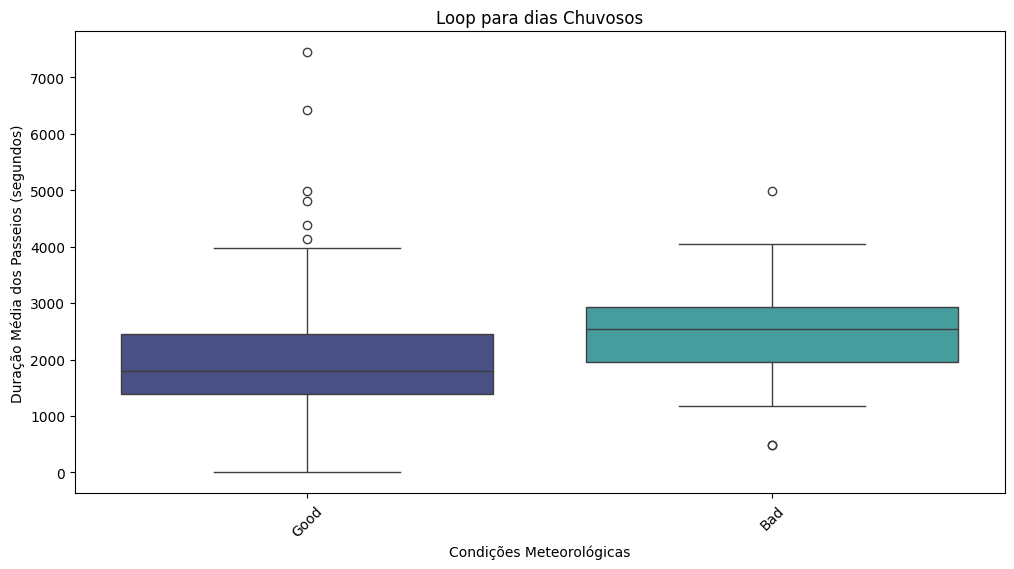

In [15]:
#Gráfico da duração média dos passeios do Loop para o Aeroporto Internacional O'Hare em dias chuvosos
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_average_trips, palette='mako')
plt.title('Loop para dias Chuvosos')
plt.xlabel('Condições Meteorológicas')
plt.ylabel('Duração Média dos Passeios (segundos)')
plt.xticks(rotation=45)
plt.show()

In [16]:
#Decida onde definir o nível de significância (alfa) por conta própria.
#Cálculo da variância da duração média dos passeios
df_avg_trips = df_average_trips_add['duration_seconds'].dropna()
df_var = df_avg_trips.var()
print(f"Variância da duração média dos passeios: {df_var}")

Variância da duração média dos passeios: 91390.89909505236


In [17]:
conditions = 'Good'
Q1 = df_average_trips['duration_seconds'].quantile(0.25)
Q3 = df_average_trips['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
cort_out = Q1 - (1.5 * IQR)
top_cort = Q3 +(1.5 * IQR)
if cort_out < 0:
    cort_out = 0
print(Q1, Q3, IQR, cort_out, top_cort)

1438.25 2580.0 1141.75 0 4292.625


C:\Users\Usuário\AppData\Local\Temp\ipykernel_12156\455895389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration_seconds', y='weather_conditions', data=df_average_trips_wo, palette='Set2')


<Axes: xlabel='duration_seconds', ylabel='weather_conditions'>

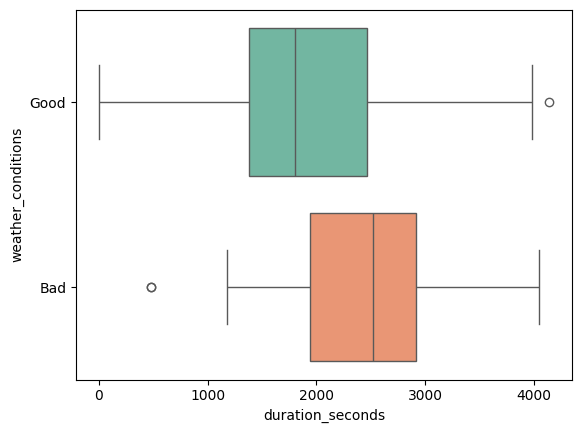

In [18]:
df_average_trips_wo = df_average_trips.query('duration_seconds <= @top_cort')

sns.boxplot(x='duration_seconds', y='weather_conditions', data=df_average_trips_wo, palette='Set2')

In [19]:
#Teste t para os passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.
alpha = 0.05
sample1 = df_average_trips_wo.query('weather_conditions == "Good"')
sample2 = df_average_trips_wo.query('weather_conditions == "Bad"')
t_stat, p_value = stats.ttest_ind(sample1.duration_seconds, sample2.duration_seconds)
print(f"test t: {t_stat}, p valor: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.")
else:
    print("Aceitamos a hipótese nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos")

test t: -7.5110122934882755, p valor: 1.2430038032744411e-13
Rejeitamos a hipótese nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.


#Como você formou as hipóteses nula e alternativa?
Hipótese nula (H0): A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos.
Hipótese alternativa (H1): A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.
O valor p obtido do teste t é comparado com o nível de significância(alpha) de 0.05. Se o valor o p for menor que alpha, rejeitamos a hipótese nula e concluímos que há uma diferença significativa na duração média dos passeios nos sábados chuvosos.

#Qual critério você usou para testar a hipótese e porque?
Eu usei o teste t para comparar a média da duração dos passeios em dias chuvosos com a média geral, pois é adequado para comparar duas médias quando os dados são normalmente distribuídos e as variâncias são iguais ou diferentes. O p-valor resultante indica se há uma diferença estatisticamente significativa entre as médias.


Nathália Sorg